**Neural Network Experimentation on IMDB Dataset**

**Introduction**

This experiment explores how different neural network architectures affect sentiment classification performance on the IMDB dataset.

**Importing Libraries**

We import essential libraries for building, training, and evaluating the neural network.




In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Loading and Preprocessing Data**

Loads the IMDB dataset and pads sequences to a fixed length for consistent input.

In [2]:
# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

# Preprocess data: Pad sequences to ensure equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**Creating the Neural Network Model**

Defines a function to build a neural network with customizable layers, activations, loss functions, and regularization.

In [3]:
def create_model(hidden_layers=2, units=64, activation='relu', loss_function='binary_crossentropy', dropout_rate=0.3, l2_reg=0.01):

    model = keras.Sequential()
    model.add(layers.Embedding(10000, 32))  # Embedding layer to convert words into dense vectors
    model.add(layers.GlobalAveragePooling1D())  # Reduces dimensionality

    # Add hidden layers dynamically based on the configuration
    for _ in range(hidden_layers):
        model.add(layers.Dense(units, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

**Training Models with Different Configurations**

We experiment with different numbers of layers, activation functions, loss functions, and units.

Training model with 1 layers, 64 units, relu activation, binary_crossentropy loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5097 - loss: 1.0622 - val_accuracy: 0.5632 - val_loss: 0.9173
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5805 - loss: 0.8829 - val_accuracy: 0.5820 - val_loss: 0.7984
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.6344 - loss: 0.7775 - val_accuracy: 0.7087 - val_loss: 0.7224
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6977 - loss: 0.7056 - val_accuracy: 0.7135 - val_loss: 0.6611
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.7440 - loss: 0.6382 - val_accuracy: 0.7888 - val_loss: 0.5939
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7837 - loss: 0.5779 - val_accuracy: 0.7886 - val_loss: 0.5488
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8127 - loss: 0.5273 - val_accuracy: 0.8358 - val_loss: 0.5046
Epoch 8/10
49/49 ━━━━━━━━━━━━

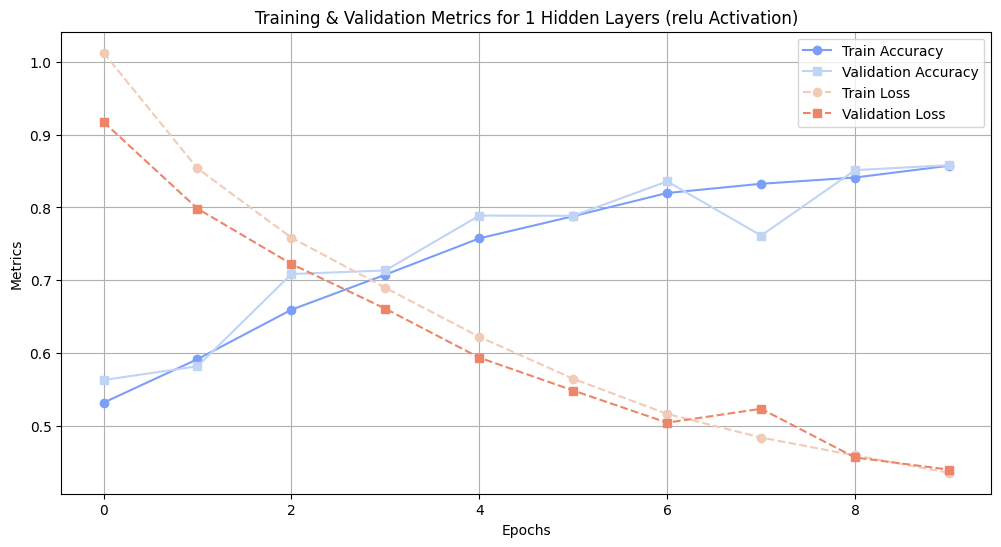

Training model with 2 layers, 64 units, relu activation, binary_crossentropy loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.5087 - loss: 1.6009 - val_accuracy: 0.6520 - val_loss: 1.2264
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5529 - loss: 1.1436 - val_accuracy: 0.5784 - val_loss: 0.9466
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5954 - loss: 0.9044 - val_accuracy: 0.7019 - val_loss: 0.8049
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6510 - loss: 0.7826 - val_accuracy: 0.6764 - val_loss: 0.7251
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6937 - loss: 0.7037 - val_accuracy: 0.7756 - val_loss: 0.6297
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7683 - loss: 0.6037 - val_accuracy: 0.8246 - val_loss: 0.5328
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.8177 - loss: 0.5205 - val_accuracy: 0.7796 - val_loss: 0.5306
Epoch 8/10
49/49 ━━━━━━━━━━━━

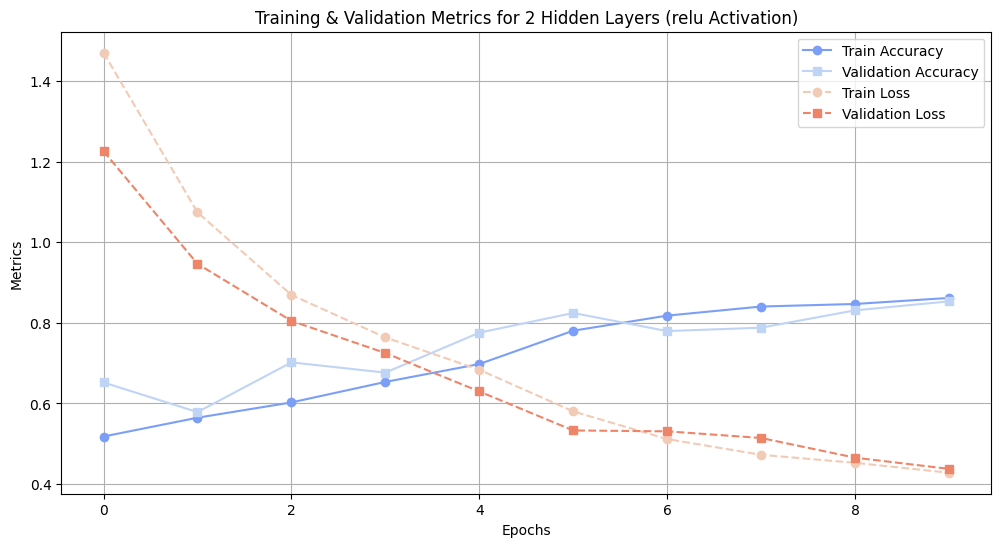

Training model with 3 layers, 64 units, relu activation, binary_crossentropy loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.5019 - loss: 2.1265 - val_accuracy: 0.5283 - val_loss: 1.5233
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5145 - loss: 1.3917 - val_accuracy: 0.5000 - val_loss: 1.0819
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5096 - loss: 1.0167 - val_accuracy: 0.5078 - val_loss: 0.8658
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5061 - loss: 0.8351 - val_accuracy: 0.5000 - val_loss: 0.7653
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.5092 - loss: 0.7517 - val_accuracy: 0.5000 - val_loss: 0.7214
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5006 - loss: 0.7158 - val_accuracy: 0.5000 - val_loss: 0.7036
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.4890 - loss: 0.7015 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 8/10
49/49 ━━━━━━━━━━━━

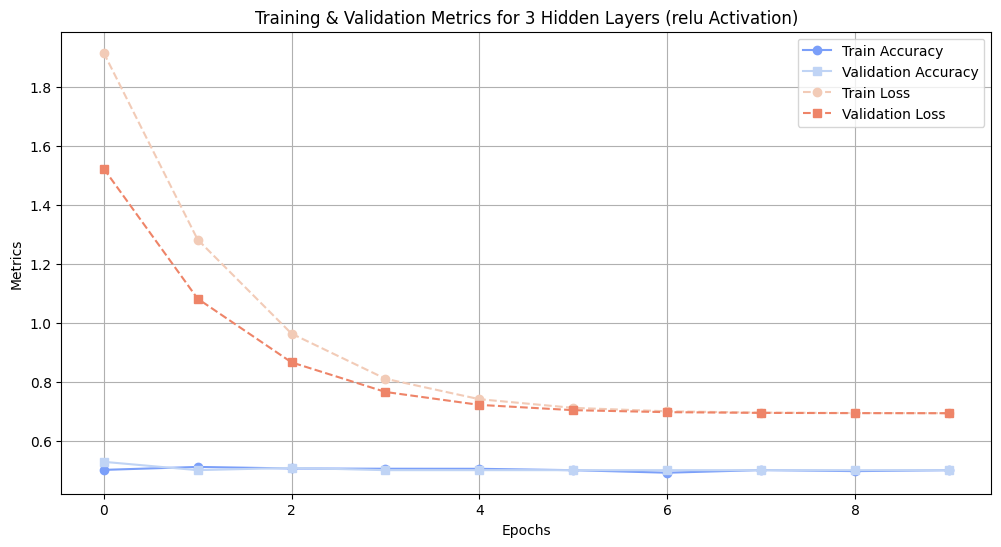

Training model with 2 layers, 32 units, relu activation, binary_crossentropy loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5134 - loss: 1.2802 - val_accuracy: 0.5595 - val_loss: 1.0920
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.5453 - loss: 1.0452 - val_accuracy: 0.5764 - val_loss: 0.9264
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5890 - loss: 0.8972 - val_accuracy: 0.7046 - val_loss: 0.8240
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.6205 - loss: 0.8057 - val_accuracy: 0.6441 - val_loss: 0.7604
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6400 - loss: 0.7474 - val_accuracy: 0.6488 - val_loss: 0.7144
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6752 - loss: 0.6996 - val_accuracy: 0.7459 - val_loss: 0.6483
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.7457 - loss: 0.6319 - val_accuracy: 0.8046 - val_loss: 0.5703
Epoch 8/10
49/49 ━━━━━━━━━━━

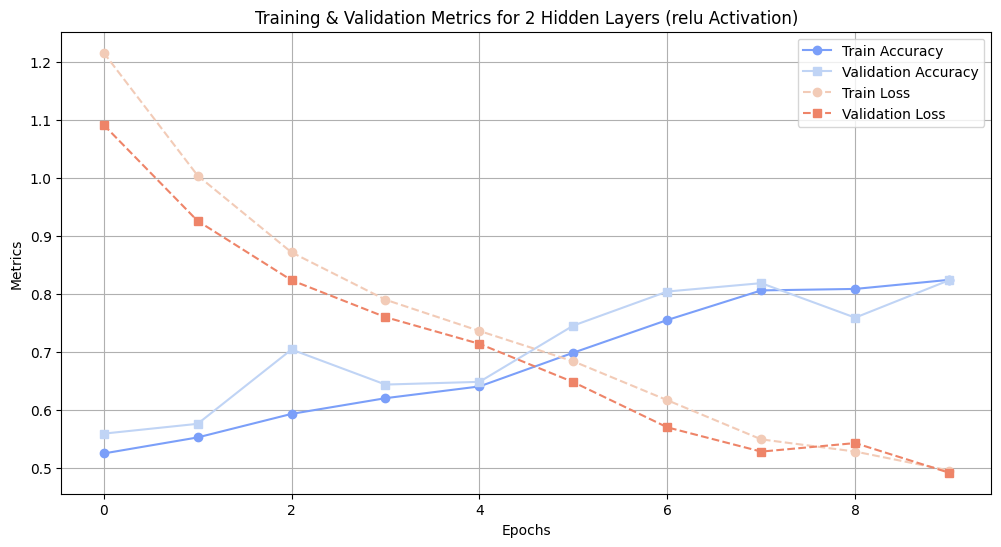

Training model with 2 layers, 128 units, relu activation, binary_crossentropy loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.5040 - loss: 2.1463 - val_accuracy: 0.5190 - val_loss: 1.3624
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5325 - loss: 1.2194 - val_accuracy: 0.6201 - val_loss: 0.9160
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5699 - loss: 0.8649 - val_accuracy: 0.5425 - val_loss: 0.7605
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.5727 - loss: 0.7426 - val_accuracy: 0.5956 - val_loss: 0.7025
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6597 - loss: 0.6829 - val_accuracy: 0.7543 - val_loss: 0.6099
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.7571 - loss: 0.5835 - val_accuracy: 0.7356 - val_loss: 0.5664
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.7880 - loss: 0.5255 - val_accuracy: 0.8365 - val_loss: 0.4810
Epoch 8/10
49/49 ━━━━━━━━

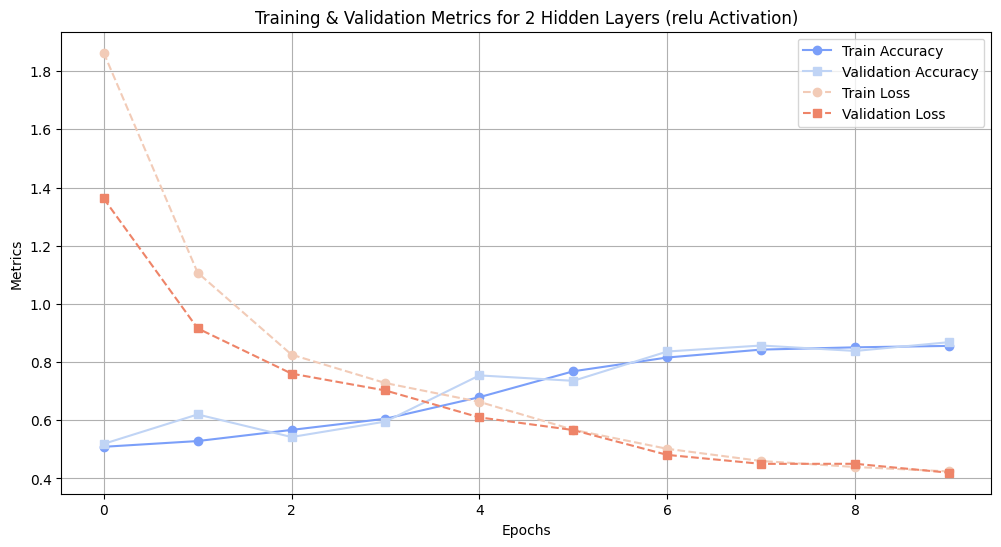

Training model with 2 layers, 64 units, tanh activation, binary_crossentropy loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.5213 - loss: 1.6141 - val_accuracy: 0.5490 - val_loss: 1.2326
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5569 - loss: 1.1478 - val_accuracy: 0.5562 - val_loss: 0.9477
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6150 - loss: 0.9024 - val_accuracy: 0.7030 - val_loss: 0.7925
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.6910 - loss: 0.7581 - val_accuracy: 0.7586 - val_loss: 0.6572
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7608 - loss: 0.6288 - val_accuracy: 0.8225 - val_loss: 0.5513
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8333 - loss: 0.5200 - val_accuracy: 0.8496 - val_loss: 0.4913
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.8419 - loss: 0.4776 - val_accuracy: 0.8067 - val_loss: 0.4944
Epoch 8/10
49/49 ━━━━━━━━━━━━

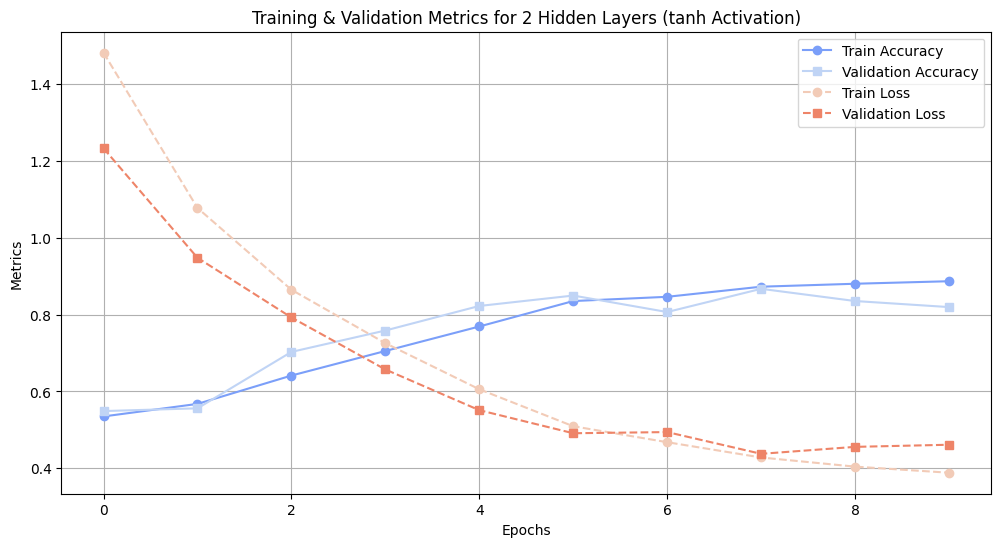

Training model with 2 layers, 64 units, relu activation, mse loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5027 - loss: 1.1478 - val_accuracy: 0.5332 - val_loss: 0.7748
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5433 - loss: 0.6927 - val_accuracy: 0.5352 - val_loss: 0.4984
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5533 - loss: 0.4574 - val_accuracy: 0.5308 - val_loss: 0.3616
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5745 - loss: 0.3420 - val_accuracy: 0.6578 - val_loss: 0.2972
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5905 - loss: 0.2883 - val_accuracy: 0.5913 - val_loss: 0.2683
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6256 - loss: 0.2641 - val_accuracy: 0.6486 - val_loss: 0.2544
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6492 - loss: 0.2513 - val_accuracy: 0.7157 - val_loss: 0.2393
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms

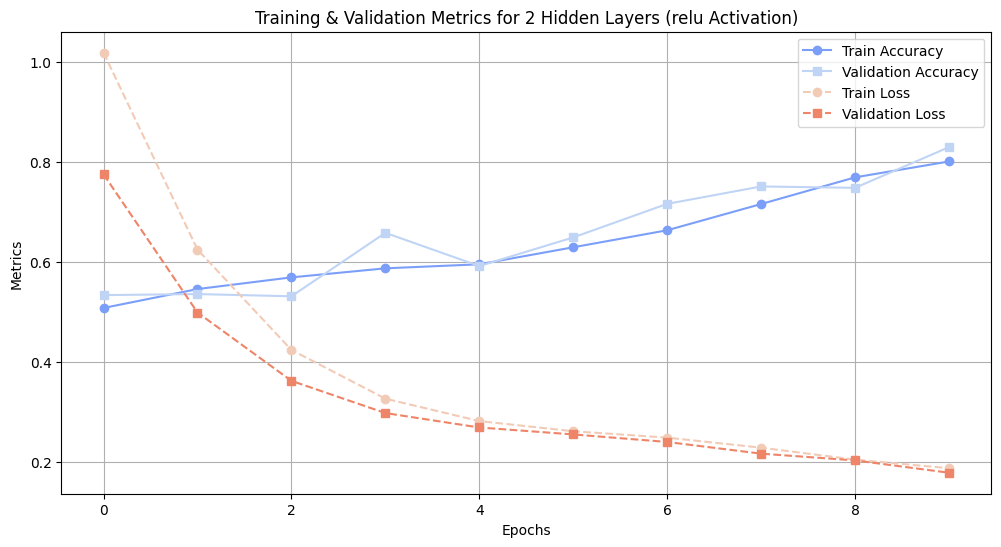

Training model with 2 layers, 64 units, tanh activation, mse loss
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5090 - loss: 1.1598 - val_accuracy: 0.5702 - val_loss: 0.7842
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5595 - loss: 0.7014 - val_accuracy: 0.5372 - val_loss: 0.5052
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5557 - loss: 0.4633 - val_accuracy: 0.5277 - val_loss: 0.3657
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5935 - loss: 0.3453 - val_accuracy: 0.6374 - val_loss: 0.2988
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6492 - loss: 0.2889 - val_accuracy: 0.6021 - val_loss: 0.2669
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6177 - loss: 0.2615 - val_accuracy: 0.6868 - val_loss: 0.2437
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6877 - loss: 0.2379 - val_accuracy: 0.7556 - val_loss: 0.2154
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms

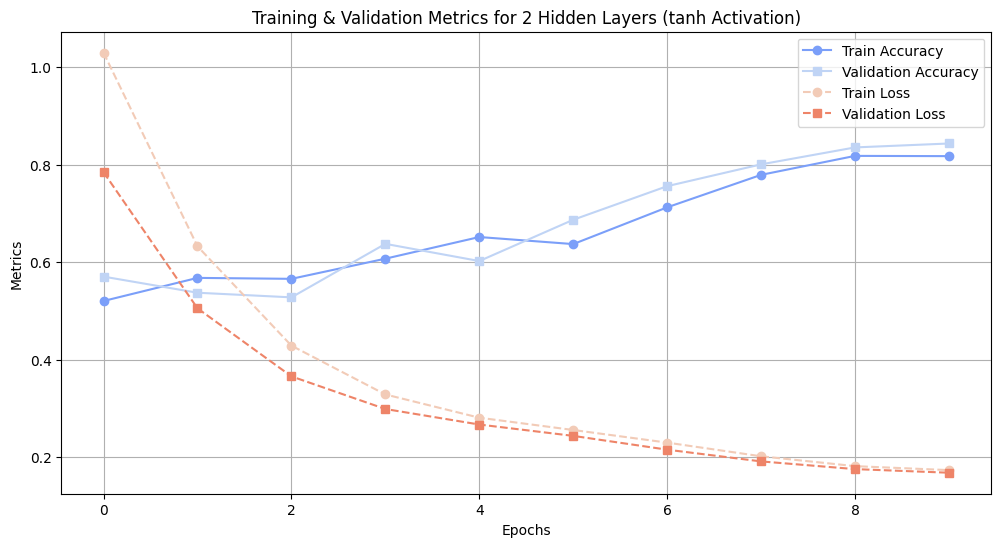

In [5]:
# Experiment configurations: Testing different architectures including tanh activation
configs = [
    (1, 64, 'relu', 'binary_crossentropy'),
    (2, 64, 'relu', 'binary_crossentropy'),
    (3, 64, 'relu', 'binary_crossentropy'),
    (2, 32, 'relu', 'binary_crossentropy'),
    (2, 128, 'relu', 'binary_crossentropy'),
    (2, 64, 'tanh', 'binary_crossentropy'),
    (2, 64, 'relu', 'mse'),
    (2, 64, 'tanh', 'mse')  # Additional model with tanh and mse loss
]

# Store results
results = []
histories = {}

# Train and evaluate models
for hidden_layers, units, activation, loss_function in configs:
    print(f"Training model with {hidden_layers} layers, {units} units, {activation} activation, {loss_function} loss")
    model = create_model(hidden_layers, units, activation, loss_function)
    history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test), verbose=1)
    val_acc = history.history['val_accuracy'][-1]  # Capture the last epoch validation accuracy
    results.append((hidden_layers, units, activation, loss_function, val_acc))
    histories[f"{hidden_layers}-{units}-{activation}-{loss_function}"] = history

#  Visualizations After Each Model Training with Legend Colors
    colors = sns.color_palette("coolwarm", 4)

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], marker='o', linestyle='-', color=colors[0], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], marker='s', linestyle='-', color=colors[1], label='Validation Accuracy')
    plt.plot(history.history['loss'], marker='o', linestyle='--', color=colors[2], label='Train Loss')
    plt.plot(history.history['val_loss'], marker='s', linestyle='--', color=colors[3], label='Validation Loss')

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title(f"Training & Validation Metrics for {hidden_layers} Hidden Layers ({activation} Activation)")
    plt.legend()
    plt.grid(True)
    plt.show()



**Visualizing Results**

Plots accuracy and loss trends for different models to compare performance.

   Hidden Layers  Units Activation        Loss Function  Validation Accuracy
0              1     64       relu  binary_crossentropy              0.85800
1              2     64       relu  binary_crossentropy              0.85340
2              3     64       relu  binary_crossentropy              0.50000
3              2     32       relu  binary_crossentropy              0.82408
4              2    128       relu  binary_crossentropy              0.86856
5              2     64       tanh  binary_crossentropy              0.81956
6              2     64       relu                  mse              0.82920
7              2     64       tanh                  mse              0.84312


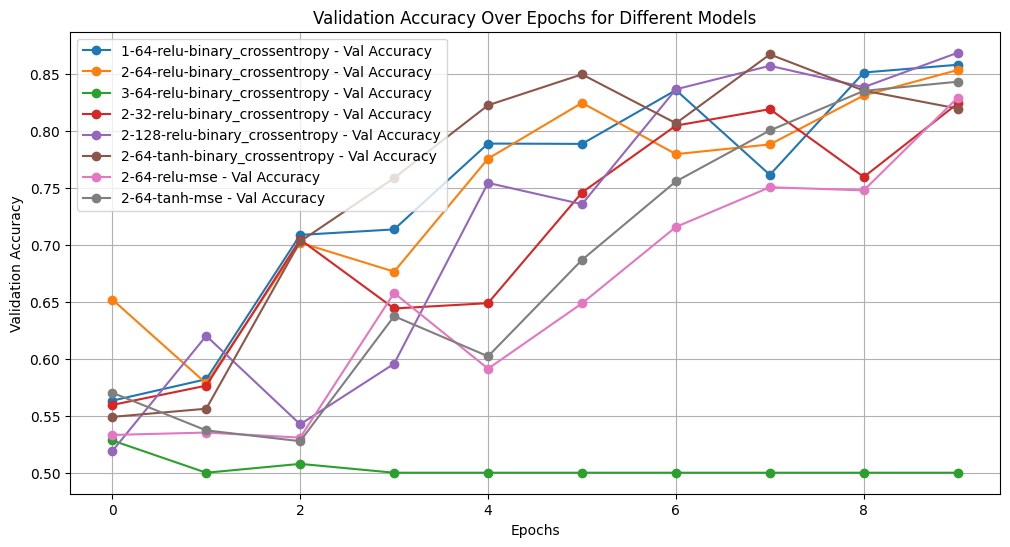

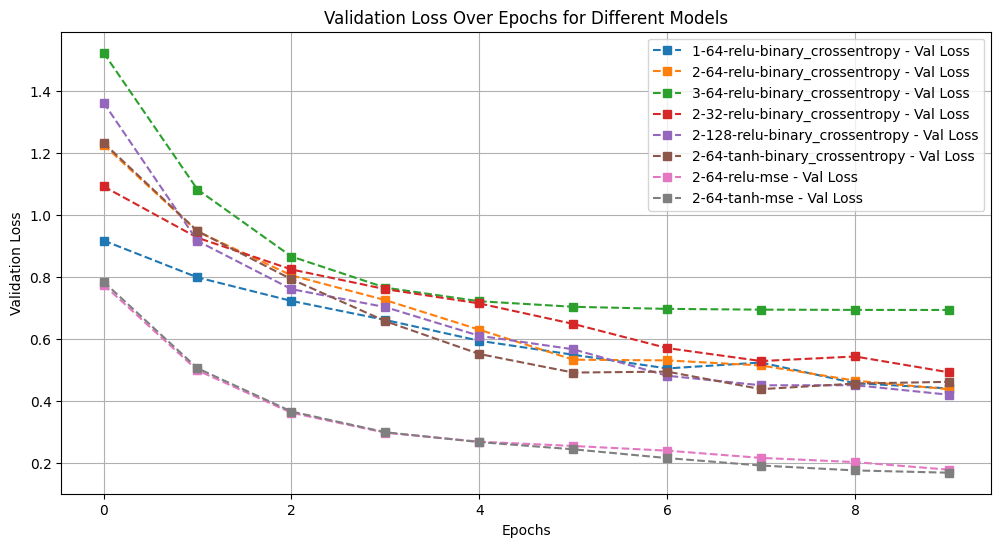

In [6]:
# Convert results to a DataFrame for visualization
df_results = pd.DataFrame(results, columns=['Hidden Layers', 'Units', 'Activation', 'Loss Function', 'Validation Accuracy'])

# Print the DataFrame
print(df_results)

#  Model Performance Comparison Visualization
plt.figure(figsize=(12, 6))
for key, history in histories.items():
    plt.plot(history.history['val_accuracy'], linestyle='-', marker='o', label=f"{key} - Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Over Epochs for Different Models")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for key, history in histories.items():
    plt.plot(history.history['val_loss'], linestyle='--', marker='s', label=f"{key} - Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Over Epochs for Different Models")
plt.legend()
plt.grid(True)
plt.show()